# Breast Cancer Classification

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys as sys
import seaborn as sns
import scipy as cp

In [2]:
#import dataset
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

#dataset = pd.read_csv('C:\\Users\\KIIT\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\breast_cancer.csv')

In [3]:
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(dataset['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [5]:
print(dataset['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
dataset['data'].shape

(569, 30)

In [7]:
data = pd.DataFrame(np.c_[dataset['data'],dataset['target']],columns = np.append(dataset['feature_names'],['target']))
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


# Data Visualizing

In [8]:
corr_matrix = data.corr()
corr_matrix['target'].sort_values(ascending = False)

target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

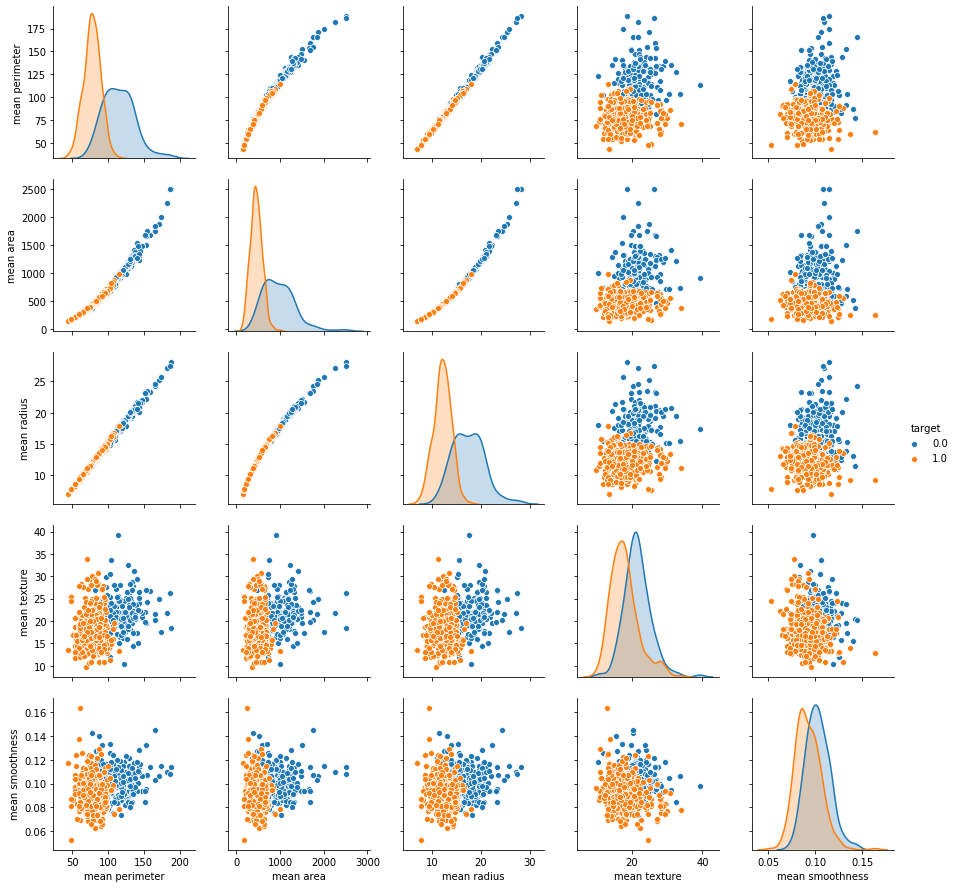

In [9]:
sns.pairplot(data, hue = 'target', vars =['mean perimeter','mean area','mean radius','mean texture','mean smoothness'])

In [10]:
data['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

# Model Building

In [38]:
x = data.drop('target',axis=1)
y = data['target']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [39]:
x=x.iloc[:,:].values
y=np.array(y)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 1.

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split,GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(f'Rows in train set: {len(x_train)}\nRows in test set: {len(x_test)}')

Rows in train set: 455
Rows in test set: 114


In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [15]:
from sklearn.svm import SVC
svm_model = SVC(kernel = 'linear',C=0.1,gamma=1,random_state=42)
classifier = svm_model.fit(x_train,y_train)

In [16]:
gamma=[1,0.9,1.1,0.1,0.001,0.0001]
c=[0.1,1,10,100,110,120]
kernel=['linear']


hyp_grid = {
    'gamma' : gamma,
    'kernel' : kernel,
    'C' : c
}

In [17]:
grid_cv = GridSearchCV(SVC(),
            param_grid=hyp_grid,
            verbose = 5, 
            refit = True,
            )

In [18]:
grid_cv.fit(x_train,y_train)
grid_cv.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.980, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.980, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................


C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.947, total=   0.0s
[CV] C=0.1, gamma=0.9, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.9, kernel=linear, score=0.980, total=   0.0s
[CV] C=0.1, gamma=0.9, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.9, kernel=linear, score=0.980, total=   0.0s
[CV] C=0.1, gamma=0.9, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.9, kernel=linear, score=0.947, total=   0.0s
[CV] C=0.1, gamma=1.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=1.1, kernel=linear, score=0.980, total=   0.0s
[CV] C=0.1, gamma=1.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=1.1, kernel=linear, score=0.980, total=   0.0s
[CV] C=0.1, gamma=1.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=1.1, kernel=linear, score=0.947, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .

[CV] ..... C=100, gamma=1.1, kernel=linear, score=0.947, total=   0.0s
[CV] C=100, gamma=1.1, kernel=linear .................................
[CV] ..... C=100, gamma=1.1, kernel=linear, score=0.934, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.954, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.947, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.934, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.954, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.947, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    0.6s finished


{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [19]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Evaluating the model

In [20]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[41  2]
 [ 0 71]]


In [21]:
a = accuracy_score(y_test,y_pred)*100
a

98.24561403508771

# Improving the model

In [22]:
min_train = x_train.min()
range_train = (x_train-min_train).max()
x_train_scaled = (x_train-min_train)/range_train

In [23]:
#sns.scatterplot(x = x_train['mean area'],y = x_train['mean smoothness'], hue = y_train)

In [24]:
#sns.scatterplot(x = x_train_scaled['mean area'],y = x_train_scaled['mean smoothness'], hue = y_train)

In [25]:
from sklearn.svm import SVC
svm_model = SVC(kernel = 'linear',C=10,gamma=0.001,random_state = 42)
classifier = svm_model.fit(x_train_scaled,y_train)

In [26]:
gamma=[1,0.9,1.1,0.1,0.001,0.0001,0.8,1.2]
c=[0.1,1,10,20,11,9,100,110,120]
kernel=['linear']


grid = {
    'gamma' : gamma,
    'kernel' : kernel,
    'C' : c
}

In [27]:
grid_cv2 = GridSearchCV(SVC(),
            param_grid=grid,
            verbose = 5, 
            refit = True,
            )

In [28]:
grid_cv2.fit(x_train_scaled,y_train)
grid_cv2.best_params_

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.850, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.907, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.861, total=   0.0s
[CV] C=0.1, gamma=0.9, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.9, kernel=linear, score=0.850, total=   0.0s
[CV] C=0.1, gamma=0.9, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.9, kernel=linear, score=0.907, total=   0.0s
[CV] C=0.1, gamma=0.9, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.9, kernel=linear, score=0.861, total=   0.0s
[CV] C=0.1, gamma=1.1, kernel=linear .................................
[CV] ..... C=0.

[CV] ...... C=10, gamma=0.8, kernel=linear, score=0.974, total=   0.0s
[CV] C=10, gamma=0.8, kernel=linear ..................................
[CV] ...... C=10, gamma=0.8, kernel=linear, score=0.980, total=   0.0s
[CV] C=10, gamma=0.8, kernel=linear ..................................
[CV] ...... C=10, gamma=0.8, kernel=linear, score=0.947, total=   0.0s
[CV] C=10, gamma=1.2, kernel=linear ..................................
[CV] ...... C=10, gamma=1.2, kernel=linear, score=0.974, total=   0.0s
[CV] C=10, gamma=1.2, kernel=linear ..................................
[CV] ...... C=10, gamma=1.2, kernel=linear, score=0.980, total=   0.0s
[CV] C=10, gamma=1.2, kernel=linear ..................................
[CV] ...... C=10, gamma=1.2, kernel=linear, score=0.947, total=   0.0s
[CV] C=20, gamma=1, kernel=linear ....................................
[CV] ........ C=20, gamma=1, kernel=linear, score=0.980, total=   0.0s
[CV] C=20, gamma=1, kernel=linear ....................................
[CV] .

[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.980, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.967, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.927, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.980, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.967, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.927, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] .. C=100, gamma=0.0001, kernel=linear, score=0.980, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:    0.9s finished


{'C': 20, 'gamma': 1, 'kernel': 'linear'}

In [29]:
grid_cv2.best_params_

{'C': 20, 'gamma': 1, 'kernel': 'linear'}

In [33]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred

array([1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.])

In [31]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[39  4]
 [ 0 71]]


In [32]:
a = accuracy_score(y_test,y_pred)*100
a

96.49122807017544